In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data = pd.read_csv('./datasets/data.csv', encoding='CP949')
target = pd.read_csv('./datasets/OECD신용등급.csv', encoding='CP949')
target.drop('신용등급', axis=1, inplace=True)

In [7]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='left')
datasets.columns = ['국가별', '시점', '인당_국민총소득', 'GDP_성장률', '디플레이터', '수출', '수입',
       '무역의존도_수출', '무역의존도_수입', '외환보유액', '부채비율', '국민부담률', '평균근로자세금', '경제활동참가율',
       '고용률', '실업률', '신용등급']
datasets['수입'] = datasets['수입'].astype(float)
datasets['무역의존도_수입'] = datasets['무역의존도_수입'].astype(float)
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        114 non-null    int64  
 1   인당_국민총소득  114 non-null    float64
 2   GDP_성장률   114 non-null    float64
 3   디플레이터     114 non-null    float64
 4   수출        114 non-null    float64
 5   수입        114 non-null    float64
 6   무역의존도_수출  114 non-null    float64
 7   무역의존도_수입  114 non-null    float64
 8   외환보유액     114 non-null    float64
 9   부채비율      114 non-null    float64
 10  국민부담률     114 non-null    float64
 11  평균근로자세금   114 non-null    float64
 12  경제활동참가율   114 non-null    float64
 13  고용률       114 non-null    float64
 14  실업률       114 non-null    float64
 15  신용등급      114 non-null    object 
dtypes: float64(14), int64(1), object(1)
memory usage: 14.4+ KB


In [8]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_국민총소득,GDP_성장률,디플레이터,수출,수입,무역의존도_수출,무역의존도_수입,외환보유액,부채비율,국민부담률,평균근로자세금,경제활동참가율,고용률,실업률
count,114.000000,114.000000,114.000000,114.000000,1.140000e+02,1.140000e+02,114.000000,114.000000,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,1.710526,32750.570175,3.348246,95.848246,2.238427e+05,2.247745e+05,36.308246,36.257544,8.296503e+04,72.816588,34.342982,38.482456,60.285965,66.111404,8.215789
std,1.053638,19334.244737,3.164914,13.415816,2.823353e+05,3.293057e+05,19.655216,19.602815,1.836847e+05,41.206568,7.007278,8.778587,5.906092,7.026458,4.194235
min,0.000000,3911.000000,-5.500000,58.200000,3.092000e+03,3.919000e+03,8.240000,2.240000,2.790000e+02,6.788000,11.400000,14.700000,48.100000,46.300000,2.600000
25%,1.000000,16402.250000,1.825000,88.625000,4.964800e+04,4.503625e+04,20.455000,22.787500,9.670250e+03,45.590500,30.500000,32.675000,57.325000,61.025000,5.100000
50%,2.000000,31591.500000,2.950000,100.000000,1.204630e+05,8.910150e+04,31.785000,29.410000,3.217000e+04,62.237500,33.100000,38.800000,59.750000,66.200000,7.350000
75%,3.000000,43878.500000,4.200000,103.900000,3.253045e+05,3.147872e+05,51.052500,50.712500,7.330925e+04,97.977500,39.350000,43.925000,63.175000,71.725000,9.825000
max,3.000000,88706.000000,25.200000,143.100000,1.503400e+06,2.248800e+06,86.700000,84.740000,1.233153e+06,234.073000,48.000000,57.100000,81.400000,83.800000,24.900000


In [12]:
datasets

,시점,인당_국민총소득,GDP_성장률,디플레이터,수출,수입,무역의존도_수출,무역의존도_수입,외환보유액,부채비율,국민부담률,평균근로자세금,경제활동참가율,고용률,실업률,신용등급
0,3,28814.0,2.8,100.0,526757.0,436499.0,35.95,29.79,367962.0,40.800,23.7,21.4,62.8,65.9,3.6,AA-
1,1,21659.0,3.8,89.9,36608.0,44453.0,25.66,31.16,28059.0,95.195,33.7,25.5,61.8,56.7,11.3,A-
2,2,31261.0,5.6,100.0,50766.0,58575.0,21.69,25.03,70907.0,79.539,30.7,20.7,63.3,60.2,8.5,A
3,3,37294.0,2.2,112.7,53536.0,61340.0,17.84,20.44,90575.0,76.615,31.2,21.8,64.1,68.3,5.3,A
4,0,38874.0,2.8,112.1,479296.0,379727.0,9.81,7.77,361639.0,140.804,25.8,29.8,62.4,69.0,4.8,AA+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,3,43503.0,2.4,108.1,427194.0,609711.0,14.57,20.79,148129.0,112.633,32.4,30.8,62.8,73.7,5.3,AAA
110,0,21232.0,3.9,68.0,63807.0,71590.0,15.37,17.24,18817.0,41.148,30.5,31.0,63.1,69.1,6.3,AA
111,1,33087.0,3.2,81.0,106097.0,125107.0,15.30,18.04,43257.0,30.270,30.0,28.5,64.4,71.5,5.0,AA+
112,2,49724.0,2.1,100.0,212634.0,201971.0,18.55,17.62,42268.0,41.985,25.3,26.8,65.4,72.4,5.2,AA+


In [13]:
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:14], datasets.iloc[:,14], test_size=0.2, random_state=42)

In [14]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

In [15]:
## alpha 값마다 결과 출력
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse = mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(pred, y_test)
    print('alpha : {0}\nmse : {1}\nrmse : {2}\nr2 : {3}\n'.format(alpha, mse, rmse, r2))

alpha : 100
mse : 13.214521899863534
rmse : 3.6351783862506024
r2 : -1.913509869359474

alpha : 10
mse : 14.777843731786868
rmse : 3.8441961099541824
r2 : -1.6794919851460905

alpha : 1
mse : 10.143490752277403
rmse : 3.184884731395691
r2 : -0.5745338982355974

alpha : 0.1
mse : 7.78314038665623
rmse : 2.7898280209819797
r2 : 0.15836695577011317

alpha : 0.01
mse : 8.160697755699488
rmse : 2.8566935004825926
r2 : 0.21240966201937805

alpha : 0.001
mse : 8.210016113828031
rmse : 2.8653125682598803
r2 : 0.21693110901702806

alpha : 0.0001
mse : 8.215063575436107
rmse : 2.8661932201852873
r2 : 0.21737492635866862



In [16]:
## 0.01과 0.0001이 많이 차이나지 않아 0.01로 확인
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(pred, y_test)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lasso.coef_} \nintercept : {lasso.intercept_}')

mse : 8.160697755699488 
rmse : 2.8566935004825926 
r2 : 0.21240966201937805 
coef : [ 1.34259583e+00 -8.26922234e-07 -7.68634454e-02 -4.92245660e-02
 -2.82364361e-06  2.53882800e-06 -5.41077249e-02  5.79296150e-02
 -6.24749886e-07  1.27576940e-02  2.58456040e-02  9.02710966e-02
  4.97033488e-01 -6.94472842e-01] 
intercept : 21.445270147312016


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


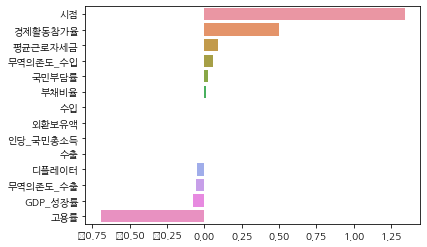

In [17]:
coef_ = pd.Series(lasso.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [18]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)

lasso = Lasso(alpha=0.01)
lasso.fit(x_train_ss, y_train)
pred = lasso.predict(x_test_ss)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lasso.coef_} \nintercept : {lasso.intercept_}')

mse : 6.10586803987383 
rmse : 2.471005471437453 
r2 : 0.6609147319137343 
coef : [ 1.36753612 -0.         -0.26126802 -0.65729022 -0.52580217  0.54262534
 -1.01587914  1.07101928 -0.13995363  0.5328258   0.17281567  0.78644876
  3.03688579 -5.01742838] 
intercept : 8.171428571428573


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


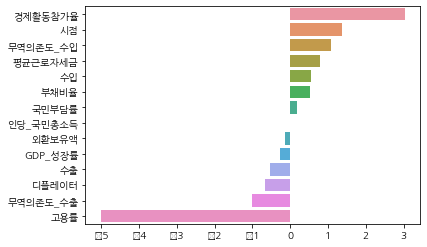

In [19]:
coef_ = pd.Series(lasso.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)

#### 모델 별 계수 확인

In [20]:
lasso1 = Lasso(alpha=1, max_iter=10000).fit(x_train_ss, y_train)
lasso01 = Lasso(alpha=0.1, max_iter=10000).fit(x_train_ss, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(x_train_ss, y_train)
lasso0001 = Lasso(alpha=0.001, max_iter=10000).fit(x_train_ss, y_train)

Text(0.5, 0, '계수 크기')

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


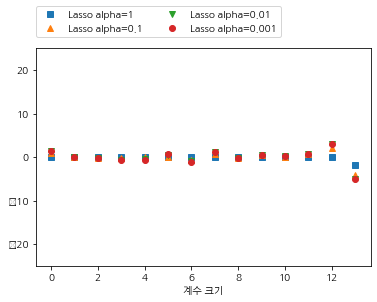

In [21]:
plt.plot(lasso1.coef_,'s',  label='Lasso alpha=1')
plt.plot(lasso01.coef_, '^', label='Lasso alpha=0.1')
plt.plot(lasso001.coef_, 'v', label='Lasso alpha=0.01')
plt.plot(lasso0001.coef_, 'o', label='Lasso alpha=0.001')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.rcParams['font.family'] = 'NanumGothic'
plt.xlabel('계수 목록')
plt.xlabel('계수 크기')